## Modelos Lineales

Los modelos lineales son una clase de modelos que asumen una relación lineal entre las variables de entrada y la variable de salida.

### Regresión Lineal

#### Regresión Lineal Univariante

La regresión lineal univariante permite modelar la relación entre **una variable* dependiente escalar $y$ y una o más variables explicativas (o variables independientes) denotadas por ${\bf x}$ de manera lineal. Una expresión general para un modelo lineal univariante viene dada por:


\begin{align}
y &=  {\bf x}^T {\bf w} + w_0 = \begin{bmatrix}
    x_1,  x_2, \cdots, x_m
    \end{bmatrix}  \begin{bmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_m
    \end{bmatrix} + w_0
\end{align}


donde:
- $y \in \mathbb{R}$ es la variable (escalar) dependiente.
- ${\bf x} \in \mathbb{R}^{m}$ es el vector de características de un dato/medida de entrada.
- ${\bf w} \in \mathbb{R}^{m}$ es el vector de parámetros del modelo lineal.
- $ w_0 \in \mathbb{R}$ es el sesgo (escalar) del modelo lineal.

Es habitual incluir el término $w_0$ (sesgo) en el vector de parámetros ${\bf w}$, obteniendo:

\begin{align}
y &=  {\bf x}^T {\bf w} = \begin{bmatrix}
    1, x_1,  x_2, \cdots, x_m
    \end{bmatrix}  \begin{bmatrix}
    w_0 \\
    w_1 \\
    w_2 \\
    \vdots \\
    w_m
    \end{bmatrix}
\end{align}

donde redefinimos ${\bf x} \in \mathbb{R}^{m+1}$ y ${\bf w} \in \mathbb{R}^{m+1}$.

El objetivo por tanto, será, dado un conjunto de $N$ puntos $\mathcal{D} = \{ {\bf x}^{(i)},  y^{(i)} \}, \quad i=1, \cdots, N$, encontrar los parámetros óptimos ${\bf w}^*$ que aproximen los datos. Habitualmente, el criterio de optimalidad viene dado por el error cuadrático medio (MSE) que deriva de una interpretación bayesiana en la que se asume que los datos siguen una distribución gausiana.

Podemos ver un ejemplo a continuación:


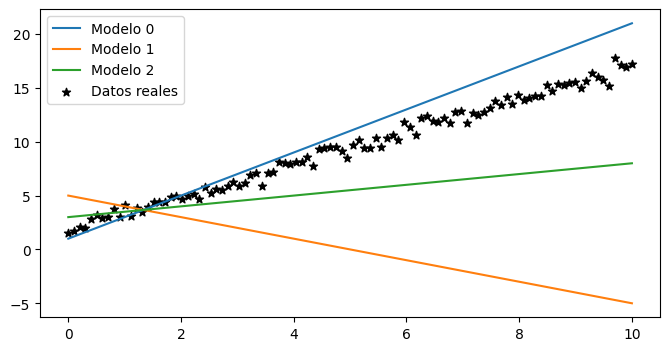

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos los datos. Partimos de un modelos lineal (real) al que añadiremos algo de ruido
w_true, b_true = 1.5, 2  # recta: y = 1.5x + 2
x = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, size=x.shape)

y_true = w_true * x + b_true + 0.5*noise

#################################### COMPLETAR ###################################
# Definimos 3 posibles modelos lineales
w_0, b_0 = 2, 1    # recta 1: y = 2x + 1
w_1, b_1 =  -1, 5  # recta 2: y = -x + 5
w_2, b_2 = 0.5, 3  # recta 3: y = 0.5x + 3

y_0 = w_0 * x + b_0
y_1 = w_1 * x + b_1
y_2 = w_2 * x + b_2
################################## Fin COMPLETAR #################################

# Plots
fig = plt.figure(figsize=(8,4))
plt.plot(x, y_0)
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.scatter(x, y_true, marker='*', color='k')
plt.legend(['Modelo 0', 'Modelo 1', 'Modelo 2', 'Datos reales'])
plt.show()

En este caso, hemos dibujado 3 modelos lineales aleatoriamente. A simple vista, vemos que el que más parecido a los datos es el azul. El modelo óptimo será aquel que minimice el MSE entre los datos y su predicción.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
  ¿Qué características tiene el ruido que hemos añadido?
</div>

Genera un ruido gausiano de media 1 y desviación típica 2 a partir de muestras de una distribución normal $\mathcal{N}(\mu=0, \sigma=1)$:

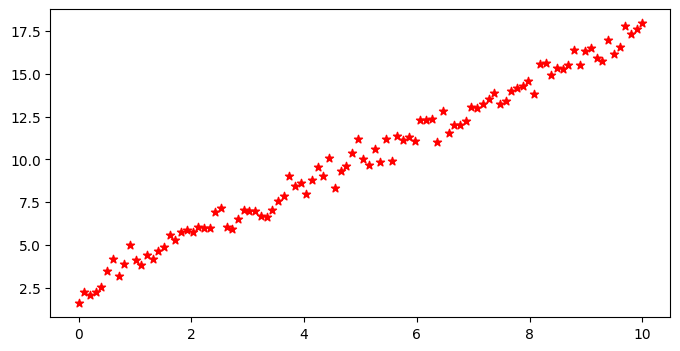

In [2]:
# Genera ruido
#################################### COMPLETAR ####################################
media = 1
std = 2
noise3 = np.random.normal(0, 1, size=x.shape) + media

y_true3 = w_true * x + b_true + 0.5*noise3

################################## Fin COMPLETAR ##################################

# Comprueba que es correcto
#################################### COMPLETAR ####################################
fig = plt.figure(figsize=(8,4))

plt.scatter(x, y_true3, marker='*', color='r')
plt.show()


################################## Fin COMPLETAR ##################################

In [3]:
print(np.std(noise3),
np.mean(noise3))

1.0407023397851483 0.9973350010466363


##### Forma Matricial

También es habitual escribir el modelo para todos los datos en $\mathcal{D}$, de forma matricial, para que quede más compacto. Por ejemplo:

\begin{align}
{\bf y} &= {\bf X} {\bf w}\\
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(N)} \\
\end{bmatrix} & = \begin{bmatrix}
    1& x_1^{(1)}&  x_2^{(1)}& \cdots& x_m^{(1)} \\
    1& x_1^{(2)}&  x_2^{(2)}& \cdots& x_m^{(2)} \\
    \vdots& \vdots&  \vdots& \ddots& \vdots \\
    1& x_1^{(N)}&  x_2^{(N)}& \cdots& x_m^{(N)} \\
    \end{bmatrix}  \begin{bmatrix}
    w_0 \\
    w_1 \\
    w_2 \\
    \vdots \\
    w_m
    \end{bmatrix}
\end{align}

#### Regresión Lineal Multivariante

Podemos ampliar el modelo al caso **multivariante**. Es decir, si tenemos que predecir varias salidas cuyas variables independientes son las mismas, podemos escribir todos los modelos lineales en forma matricial.  
En particular, los datos vienen definidos por $\mathcal{D} = \{ {\bf x}^{(i)},  {\bf y}^{(i)} \}$

donde:
- $i = 1, \cdots, N$ son los índices que numeran los $N$ ejemplos (datos).
- ${\bf x}^{(i)} \in \mathbb{R}^{(m+1)}$ son las $m$ características independientes (ampliadas).
- ${\bf y}^{(i)} \in \mathbb{R}^{n}$ es el vector con las $n$ variables dependientes a predecir.

Con esto, podemos definir de forma matricial el siguiente modelo lineal multivariante:

\begin{align}
{\bf Y} &=  {\bf X} {\bf W}
 \\
\begin{bmatrix} [{\bf y}^{(1)}]^T \\ [{\bf y}^{(2)}]^T \\ \vdots \\ [{\bf y}^{(N)}]^T \end{bmatrix} &= \begin{bmatrix} [1, {\bf x}^{(1)}]^T \\ [1, {\bf x}^{(2)}]^T \\ \vdots \\ [1, {\bf x}^{(N)}]^T \end{bmatrix} \begin{bmatrix}
w_{01} & w_{02} & \cdots & w_{0n} \\
w_{11} & w_{12} & \cdots & w_{1n} \\
w_{21} & w_{22} & \cdots & w_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \cdots & w_{mn}
\end{bmatrix}\\
\begin{bmatrix}
y_{1}^{(1)} & y_{2}^{(1)} & \cdots & y_{n}^{(1)} \\
y_{1}^{(2)} & y_{2}^{(2)} & \cdots & y_{n}^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
y_{1}^{(N)} & y_{2}^{(N)} & \cdots & y_{n}^{(N)}
\end{bmatrix} &= \begin{bmatrix}
1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{m}^{(1)} \\
1 & x_{1}^{(2)} & x_{2}^{(2)} & \cdots & x_{m}^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{1}^{(N)} & x_{2}^{(N)} & \cdots & x_{m}^{(N)}
\end{bmatrix}  \begin{bmatrix}
w_{01} & w_{02} & \cdots & w_{0n} \\
w_{11} & w_{12} & \cdots & w_{1n} \\
w_{21} & w_{22} & \cdots & w_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \cdots & w_{mn}
\end{bmatrix}
\end{align}

donde, a su vez:

- ${\bf X} \in \mathbb{R}^{N \times (m+1)}$ es una matriz compuesta como vector de vectores de características independientes (traspuestos) de todos los ejemplos de entrada.
- ${\bf Y} \in \mathbb{R}^{N \times n}$ es una matriz compuesta como vector de vectores de características dependientes (traspuestos) de todos los ejemplos de salida.
- ${\bf W} \in \mathbb{R}^{(m+1) \times n}$ es la matriz de pesos ampliada.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
  No existe una única notación para describir estos modelos. Es muy positivo que compares o te detengas a recordar y entender qué representa cada escalar, vector y matriz.
</div>

### Definición del problema de regresión

Dado un modelo $f({\bf x})$, es decir, una familia de funciones, queremos encontrar la función que relacione el conjunto de datos $\mathcal{D} = \{ {\bf x}^{(i)},  {\bf y}^{(i)} \}$, tal que:

$$
{\bf y}^{(i)} = f({\bf x}^{(i)}), \quad \forall ( {\bf x}^{(i)},  {\bf y}^{(i)}) \in \mathcal{D}
$$

En el caso particular de la regresión lineal, el modelo será el definido anteriormente. Es decir, tenemos un modelo lineal paramétrico con el que ajustar los datos. El problema consiste, por tanto, en encontrar dichos parámetros.
#### Resolución

Para resolver dicho problema podemos usar métodos directos o numéricos.

##### Método directo

Obtener los parámetros del modelo lineal consiste en invertir la equación ${\bf y}  =  {\bf X} {\bf w}$. Para invertir un sistema lineal, recordamos de Álgebra la casuística posible:

```mermaid
flowchart TD
    A[Sistema Lineal] --> |Tiene solución| B(Compatible)
    B --> |Determinado| D(Única solución)
    B --> |No Determinado| E(Soluciones infinitas)
    A --> |No tiene solución| F(Incompatible)

```

En general, nuestro sistema está sobredeterminado, pues añadimos una ecuación (fila) a ${\bf X}$ con cada ejemplo de entrenamiento y solemos tener muchos más ejemplos que variables independientes ($N > m$). Además, bien porque los datos están perturbados por algún ruido y/o porque no están contenidos en un hiperplano (${\bf y} \notin Im(X)$), el sistema no tendrá solución y será incompatible. Esto nos fuerza a relajar la resolución del sistema por una aproximación. En particular, buscamos los parámetros ${\bf w}$ que minimicen la norma cuadrática del residuo $r= {\bf X} {\bf w} - {\bf y}$. Es decir:

$$
  {\bf w}^* = arg\min_{{\bf w}}||{\bf X} {\bf w} - {\bf y}||_2^2.
$$

Este problema se puede resolver calculando el gradiente del campo escalar $\Phi({\bf w}) = ||{\bf X} {\bf w} - {\bf y}||_2^2$ e igualando a ${\bf 0}$:

$$
\nabla\Phi({\bf w^*}) = {\bf 0}.
$$

De aquí, se pueden deducir las ecuaciones normales del problema de Mínimos Cuadrados:

$$
{\bf X^T}{\bf X}{\bf w^*} = {\bf X^T}{\bf y}
$$

- Si ${\bf X^T}{\bf X}$ es invertible, podemos obtener la solución como:

$$
{\bf w^*} = ({\bf X^T}{\bf X})^{-1}{\bf X^T}{\bf y}
$$

- Si ${\bf X^T}{\bf X}$ **no** es invertible, podemos hacer uso de la Pseudo-Inversa de Moore-Penrose ${\bf X}^{\dagger}$ para resolver el sistema lineal, que nos dará la solución aproximada de mínima energía:

$$
{\bf w}^* = {\bf X}^{\dagger} {\bf y}.
$$

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
Ejercicio voluntario: calcular qué método es más rápido para obtener los parámetros óptimos ${\bf w}^*$. ¿Qué ventajas tiene el método de la pseudo-inversa?
</div>


##### Método numérico (descenso de gradiente)

Cuando el cálculo de la inversa o pseudo-inversa es muy costoso porque la matriz ${\bf X}$ es demasiado grande (crece con el número de ejemplos), es habitual pasar a métodos numéricos. En Aprendizaje Profundo, el más utilizado es el descenso de gradiente que revisitaremos en más detalle más adelante.
<!-- Una vez definidos los modelos, pasamos a definir el problema a resolver en regresión lineal. Desde una interpretación bayesiana[^1], se puede deducir que la solución del problema de regresión es:

$$
  {\bf w}^* = arg\min_{{\bf w}} \frac{1}{N}||{\bf X} {\bf w} - {\bf y}||_2^2.
$$

Es decir, buscamos los parámetros que minimizan el error cuadrático medio (MSE). Habitualmente, la predicción se escribe como $\hat{{\bf y}}({\bf X}; {\bf w}) = {\bf X} {\bf w}$ o simplemente $\hat{{\bf y}} = {\bf X} {\bf w}$:
$$
  {\bf w}^* = arg\min_{{\bf w}} \frac{1}{N}||\hat{{\bf y}} - {\bf y}||_2^2 = arg\min_{{\bf w}} \frac{1}{N} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})^2 .
$$

[^1]: Mathematics for Machine Learning - (9.1). -->

### Ejemplo: Regresión Lineal
Creamos un conjunto de datos de 2 dimensiones para poder representarlos en 3D. Usamos un plano ('linear') o una parábola ('quadratic') para general los puntos.

In [4]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

num_samples = 1000

np.random.seed(0)
X = np.random.rand(num_samples, 2)  # num_samples muestras, 2 características

tipo = 'linear'

if tipo == 'linear':
    w_true = np.array([2, -3])
    b_true = 5
    y = X @ w_true + b_true + np.random.randn(num_samples) * 0.5  # Agregando un poco de ruido
elif tipo == 'quadratic':
    a, b, c =  -2, 1.5, -2
    y = np.sum(a*X**2 + b*X + c + 0.05*np.random.randn(*X.shape) , -1)
#################################### COMPLETAR ####################################
# Añade alguna otra distribución de datos

################################## Fin COMPLETAR ##################################
else:
    print('modelo no válido')

scatter_points = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y,
                              mode='markers',
                              marker=dict(size=5, color='blue'),
                              name='Puntos de Datos')

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=dict(text=r'x1', font=dict(size=12))),
        yaxis=dict(title=dict(text=r'x2', font=dict(size=12))),
        zaxis=dict(title=dict(text='y', font=dict(size=12))),
        aspectmode='cube',

    ),
    title='Muestras del modelo: "{}"'.format(tipo),
    width=700,  # Aumentar el ancho de la figura
    height=500,  # Aumentar la altura de la figura
    margin=dict(l=0, r=0, b=0, t=50),  # Reducir los márgenes
)


fig = go.Figure(data=[scatter_points], layout=layout)

pio.show(fig)

Comprobamos las dimensiones de ${\bf{X}}$ e ${\bf{y}}$:

In [5]:
#################################### COMPLETAR ####################################
X.shape, y.shape
################################## Fin COMPLETAR ##################################

((1000, 2), (1000,))

Creamos la matriz del sistema ${\bf X}$ que incluye el sesgo: `X_bias`

In [6]:
# Añadir una columna de unos a X para tener en cuenta el término de sesgo
#################################### COMPLETAR ####################################
#X= X.T
#X_bias = np.vstack((np.ones(X.shape[1]), X))


X_bias = np.c_[np.ones(X.shape[0]), X]
X_bias.shape

(1000, 3)

Calculamos ${\bf w^*}$ directamente (asumiendo que ${\bf X^T}{\bf X}$ es invertible)

In [7]:
#################################### COMPLETAR ####################################
from numpy import linalg
# @ prod matricial
# np.matmul(X.T, X)
w_opt= np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
################################## Fin COMPLETAR ##################################

Definimos el modelo lineal como función

In [8]:
#################################### COMPLETAR ####################################
def linear_model(x1, x2):
    w0, w1, w2 = w_opt[0], w_opt[1], w_opt[2]
    return  x1*w1 + x2*w2 + w0
################################## Fin COMPLETAR ##################################

Generamos una cuadrícula de puntos

In [9]:
x1_range = np.linspace(0, 1, 10)
x2_range = np.linspace(0, 1, 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

Evaluamos el modelo en los puntos de la cuadrícula

In [10]:
#################################### COMPLETAR ####################################
y_pred = linear_model(x1_grid, x2_grid)
y_pred.shape
################################## Fin COMPLETAR ##################################

(10, 10)

Pintamos el resultado junto con los datos

In [11]:
scatter_points = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(size=5, color='blue'), name='Puntos de Datos')
hyperplane_surface = go.Surface(x=x1_grid, y=x2_grid, z=y_pred, opacity=0.5, showscale=False, name='Hiperplano')

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=dict(text=r'x1', font=dict(size=12))),
        yaxis=dict(title=dict(text=r'x2', font=dict(size=12))),
        zaxis=dict(title=dict(text='y', font=dict(size=12))),
        aspectmode='cube',

    ),
    title='Modelo lineal que aproxima los datos',
    width=700,  # Aumentar el ancho de la figura
    height=500,  # Aumentar la altura de la figura
    margin=dict(l=0, r=0, b=0, t=50),  # Reducir los márgenes
)


fig = go.Figure(data=[scatter_points, hyperplane_surface], layout=layout)

pio.show(fig)

### Clasificación Lineal

La clasificación lineal consiste en añadir una función discriminante al modelo lineal anterior. Recordemos que, clasificar, consiste en asignar una clase a un objeto (dato). Por lo tanto, ahora queremos encontrar un hiperplano que separe 2 clases de datos. Consideremos la función discriminante signo ($sign: \mathbb{R} \to \{-1, 1 \}$). Entonces, el modelo de clasificación lineal es:


\begin{align}
{\bf y} &= {\bf X} {\bf w}\\
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(N)} \\
\end{bmatrix} & = sign \left(\begin{bmatrix}
    1& x_1^{(1)}&  x_2^{(1)}& \cdots& x_m^{(1)} \\
    1& x_1^{(2)}&  x_2^{(2)}& \cdots& x_m^{(2)} \\
    \vdots& \vdots&  \vdots& \ddots& \vdots \\
    1& x_1^{(N)}&  x_2^{(N)}& \cdots& x_m^{(N)} \\
    \end{bmatrix}  \begin{bmatrix}
    w_0 \\
    w_1 \\
    w_2 \\
    \vdots \\
    w_m
    \end{bmatrix} \right)
\end{align}

donde:
- $i = 1, \cdots, N$ son los índices que numeran los $N$ ejemplos (datos).
- ${\bf y} \in \{-1, 1\}^{N}$ es el vector de la variable dependiente.
- ${\bf X} \in \mathbb{R}^{N \times (m+1)}$ es la matriz de características.
- ${\bf w} \in \mathbb{R}^{D}$ es el vector de parámetros (incluido el sesgo).
- $sign: \mathbb{R} \rightarrow \{-1, 1\}$ es la función signo.

Creamos los datos como gausianas $\mathcal{N}(\mu_{(2,2)},1)$ y $\mathcal{N}(\mu_{(-2,-2)},1)$

array([[ 1.        ,  3.76405235,  2.40015721],
       [ 1.        ,  2.97873798,  4.2408932 ],
       [ 1.        ,  3.86755799,  1.02272212],
       [ 1.        ,  2.95008842,  1.84864279],
       [ 1.        ,  1.89678115,  2.4105985 ],
       [ 1.        ,  2.14404357,  3.45427351],
       [ 1.        ,  2.76103773,  2.12167502],
       [ 1.        ,  2.44386323,  2.33367433],
       [ 1.        ,  3.49407907,  1.79484174],
       [ 1.        ,  2.3130677 ,  1.14590426],
       [ 1.        , -0.55298982,  2.6536186 ],
       [ 1.        ,  2.8644362 ,  1.25783498],
       [ 1.        ,  4.26975462,  0.54563433],
       [ 1.        ,  2.04575852,  1.81281615],
       [ 1.        ,  3.53277921,  3.46935877],
       [ 1.        ,  2.15494743,  2.37816252],
       [ 1.        ,  1.11221425,  0.01920353],
       [ 1.        ,  1.65208785,  2.15634897],
       [ 1.        ,  3.23029068,  3.20237985],
       [ 1.        ,  1.61267318,  1.69769725],
       [ 1.        ,  0.95144703,  0.579

In [22]:
np.random.seed(0)

#################################### COMPLETAR ####################################
X_class0 = np.random.randn(50,2) + np.array([2,2])
X_class1 = np.random.randn(50,2) + np.array([-2,-2])

X = np.vstack([X_class0,X_class1])
y = np.hstack([np.ones(50), -np.ones(50)])

# Añadir una columna de unos para el sesgo
X_bias = np.c_[np.ones(X.shape[0]), X]

################################## Fin COMPLETAR ##################################

fig = go.Figure()

# Puntos de la clase 0
fig.add_trace(go.Scatter(x=X_class0[:, 0], y=X_class0[:, 1],
                         mode='markers', marker=dict(color='red', size=8), name='Clase 0'))

# Puntos de la clase 1
fig.add_trace(go.Scatter(x=X_class1[:, 0], y=X_class1[:, 1],
                         mode='markers', marker=dict(color='blue', size=8), name='Clase 1'))

# Configurar los ejes
fig.update_layout(
    xaxis_title='X1',
    yaxis_title='X2',
    width=800,  # Ancho de la figura
    height=600,  # Altura de la figura
    margin=dict(l=0, r=0, b=0, t=50)  # Márgenes
)

fig.show()

Calculamos los parámetros óptimos del modelo lineal utilizando la fórmula de mínimos cuadrados y definimos el modelo lineal:

In [ ]:
#################################### COMPLETAR ####################################
w_opt =

def linear_model(x1, x2):
    w0, w1, w2 =
    return

Creamos una cuadrícula de puntos para representar la frontera de decisión despejando la variable $x_2 = - (w_0 + w_1 x_1)/w_2$ del modelo y pintamos la gráfica.

In [ ]:
#################################### COMPLETAR ####################################
x1 =

w0, w1, w2 =
x2 =
################################## Fin COMPLETAR ##################################

fig = go.Figure()

# Puntos de la clase 0
fig.add_trace(go.Scatter(x=X_class0[:, 0], y=X_class0[:, 1],
                         mode='markers', marker=dict(color='red', size=8), name='Clase 0'))

# Puntos de la clase 1
fig.add_trace(go.Scatter(x=X_class1[:, 0], y=X_class1[:, 1],
                         mode='markers', marker=dict(color='blue', size=8), name='Clase 1'))

fig.add_trace(go.Scatter(x=x1, y=x2, mode='lines', line=dict(color='black', width=2), name='Frontera de Decisión'))

# Configurar los ejes
fig.update_layout(
    xaxis_title='X1',
    yaxis_title='X2',
    width=800,  # Ancho de la figura
    height=600,  # Altura de la figura
    margin=dict(l=0, r=0, b=0, t=50)  # Márgenes
)

fig.show()